In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display 
from sklearn.model_selection import train_test_split  
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.cluster import KMeans

# Load the dataset  
website_traffic = pd.read_csv("website_traffic.csv")
website_traffic

,Page Views,Session Duration,Bounce Rate,Traffic Source,Time on Page,Previous Visits,Conversion Rate
0,5,11.051381,0.230652,Organic,3.890460,3,1.0
1,4,3.429316,0.391001,Social,8.478174,0,1.0
2,4,1.621052,0.397986,Organic,9.636170,2,1.0
3,5,3.629279,0.180458,Organic,2.071925,3,1.0
4,5,4.235843,0.291541,Paid,1.960654,5,1.0
...,...,...,...,...,...,...,...
1995,1,2.724513,0.207187,Referral,1.324206,2,1.0
1996,3,0.392856,0.095559,Organic,3.824416,1,1.0
1997,4,9.899823,0.446622,Organic,1.288675,1,1.0
1998,3,0.393319,0.278340,Paid,5.037584,2,1.0


In [2]:
website_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Page Views        2000 non-null   int64  
 1   Session Duration  2000 non-null   float64
 2   Bounce Rate       2000 non-null   float64
 3   Traffic Source    2000 non-null   object 
 4   Time on Page      2000 non-null   float64
 5   Previous Visits   2000 non-null   int64  
 6   Conversion Rate   2000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 109.5+ KB


In [3]:
k = 6  # Determine how many of the largest correlations to consider (top 6)  

# Calculate the correlation matrix while restricting to numeric columns  
correlation_matrix = website_traffic.corr(numeric_only=True)  # Restricts the correlation calculation to only numeric columns in the DataFrame.  

# Display the correlation matrix  
display(correlation_matrix) 

# Retrieve the top k columns with the highest correlation to "Conversion Rate"  
cols = correlation_matrix.nlargest(k, "Conversion Rate")['Conversion Rate'].index  

# Print the indices of the top correlated columns  
print("\nTop correlated columns with 'Conversion Rate':")  
cols  # Prints out the indices (column names) of the highest correlated columns

,Page Views,Session Duration,Bounce Rate,Time on Page,Previous Visits,Conversion Rate
Page Views,1.000000,-0.012788,0.030223,0.023941,0.028595,0.126635
Session Duration,-0.012788,1.000000,-0.015931,-0.013985,-0.025534,0.177798
Bounce Rate,0.030223,-0.015931,1.000000,0.039340,-0.015860,-0.049051
Time on Page,0.023941,-0.013985,0.039340,1.000000,-0.028729,0.229669
Previous Visits,0.028595,-0.025534,-0.015860,-0.028729,1.000000,0.109496
Conversion Rate,0.126635,0.177798,-0.049051,0.229669,0.109496,1.000000



Top correlated columns with 'Conversion Rate':


Index(['Conversion Rate', 'Time on Page', 'Session Duration', 'Page Views',
       'Previous Visits', 'Bounce Rate'],
      dtype='object')

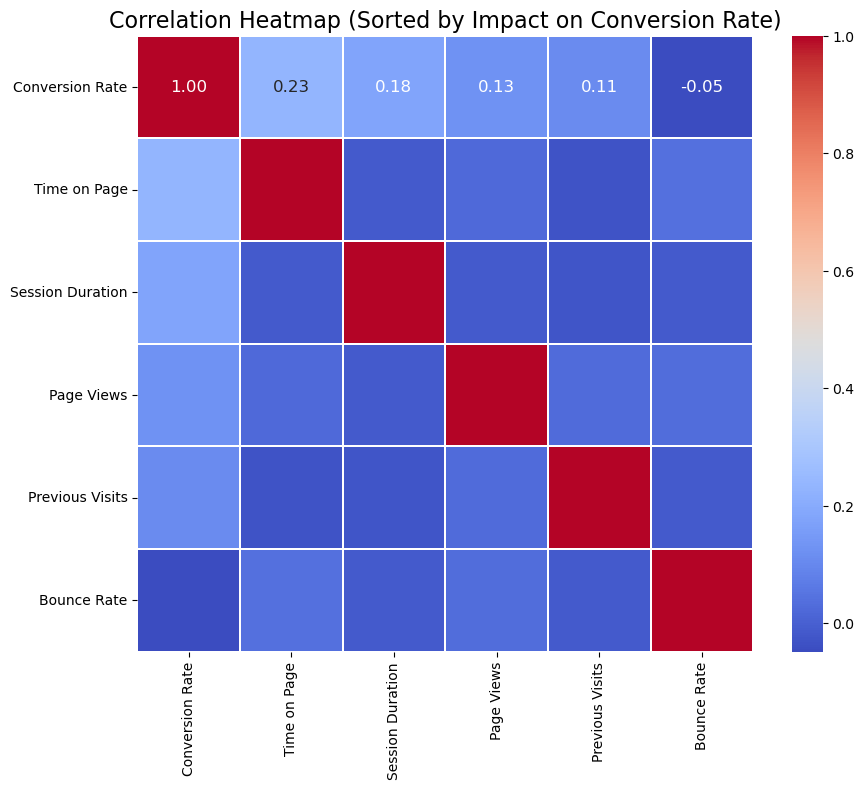

In [4]:
# Calculate the correlation coefficients for the selected columns  
cm = np.corrcoef(website_traffic[cols].values.T)

# Create and display the heatmap  
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cm, vmax=1.0, linewidth=0.01, square=True, annot = True, fmt=".2f",cmap='coolwarm', xticklabels=cols.values, annot_kws = {'size': 12}, yticklabels=cols.values)
plt.title('Correlation Heatmap (Sorted by Impact on Conversion Rate)', fontsize=16)  
plt.show()  

In [5]:
#Question 2

# Feature Selection: Choose features with a positive correlation as potential predictors for Conversion Rate.  
positive_corr_features = correlation_matrix['Conversion Rate'][correlation_matrix['Conversion Rate'] > 0].index  

# Print the positive correlated features with Conversion Rate  
print("\nFeatures with a positive correlation to 'Conversion Rate':")  
print(positive_corr_features)

# Create a DataFrame to show all the positive correlated features and their data  
positive_corr_data = website_traffic[positive_corr_features]  

# Display the DataFrame with positive correlated features  
# print("\nData for features with a positive correlation to 'Conversion Rate':")  
# display(positive_corr_data)  


Features with a positive correlation to 'Conversion Rate':
Index(['Page Views', 'Session Duration', 'Time on Page', 'Previous Visits',
       'Conversion Rate'],
      dtype='object')


In [6]:
# Question 3: Define X and y for prediction  
# drop to ensure that the feature matrix X only contains the input features and not the target variable, making it suitable for training predictive models.
x = website_traffic[positive_corr_features].drop(['Conversion Rate'], axis=1)  
y = website_traffic['Conversion Rate']  

print("\nFeature matrix (X):")  
display(x)  

print("\nTarget variable (y):")  
display(y)  


Feature matrix (X):


,Page Views,Session Duration,Time on Page,Previous Visits
0,5,11.051381,3.890460,3
1,4,3.429316,8.478174,0
2,4,1.621052,9.636170,2
3,5,3.629279,2.071925,3
4,5,4.235843,1.960654,5
...,...,...,...,...
1995,1,2.724513,1.324206,2
1996,3,0.392856,3.824416,1
1997,4,9.899823,1.288675,1
1998,3,0.393319,5.037584,2



Target variable (y):


0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
1995    1.0
1996    1.0
1997    1.0
1998    1.0
1999    1.0
Name: Conversion Rate, Length: 2000, dtype: float64

In [7]:
### Question 4: Data Splitting  
train_x, val_x, train_y, val_y = train_test_split(x, y, test_size=0.2, random_state= 40)  

print("\nTraining feature matrix (train_x):")  
display(train_x)  

print("\nValidation feature matrix (val_x):")  
display(val_x)  

print("\nTraining target variable (train_y):")  
display(train_y)  

print("\nValidation target variable (val_y):")  
display(val_y)  


Training feature matrix (train_x):


,Page Views,Session Duration,Time on Page,Previous Visits
1239,6,9.175798,3.220546,3
426,6,0.358402,0.828145,3
1249,4,0.914746,0.641850,2
727,5,2.567793,5.111094,1
800,3,0.898814,6.165049,3
...,...,...,...,...
1016,6,2.848552,2.320080,6
165,5,1.207682,3.116233,0
7,4,1.685740,3.478016,5
219,5,1.287714,2.285622,2



Validation feature matrix (val_x):


,Page Views,Session Duration,Time on Page,Previous Visits
423,10,0.673086,0.736713,7
1495,6,2.386999,7.805933,1
1618,8,0.943448,2.408899,2
1099,6,10.985852,2.770662,5
1307,3,0.481569,3.258888,0
...,...,...,...,...
739,6,1.552695,1.844890,1
1379,5,4.429313,1.234200,1
837,8,7.698716,2.462810,2
877,10,4.310475,4.242693,1



Training target variable (train_y):


1239    1.000000
426     0.719286
1249    0.812323
727     1.000000
800     1.000000
          ...   
1016    1.000000
165     1.000000
7       1.000000
219     1.000000
1350    1.000000
Name: Conversion Rate, Length: 1600, dtype: float64


Validation target variable (val_y):


423     1.0
1495    1.0
1618    1.0
1099    1.0
1307    1.0
       ... 
739     1.0
1379    1.0
837     1.0
877     1.0
828     1.0
Name: Conversion Rate, Length: 400, dtype: float64

In [8]:
### Question 5: Calculate MAE using Decision Tree Regressor  
# Create a Decision Tree Regressor model  
model = LinearRegression()
# model = DecisionTreeRegressor(random_state= 42)
model.fit(train_x, train_y)  # Train the model

LinearRegression()

In [9]:
### Question 6: Analyse Results
val_y_pred = model.predict(val_x) 
# Evaluate the model using Mean Absolute Error (MAE)  
mae = mean_absolute_error(val_y, val_y_pred)  

print("\nModel Evaluation:")  
print(f"Mean Absolute Error (MAE): {mae}")  

# Interpretation of the MAE  
interpretation = (  
    "The Mean Absolute Error (MAE) of approximately {:.4f} indicates that, on average, the predictions made "  
    "by the Linear Regression model for the Conversion Rate are off by about {:.4f} units. Since the Conversion "  
    "Rate typically ranges between 0 and 1, this MAE value suggests that the model's predictions are quite accurate" 
    "(no vast differences between the trainning and testing), "  
    "with errors being relatively small compared to the range of possible values. This indicates that the Linear "  
    "Regression model is effectively capturing the underlying trends in the data, leading to a good performance in "  
    "predicting the target variable. Overall, the model demonstrates a strong ability to predict conversion rates with "  
    "minimal average error."  
).format(mae, mae)  

print("\nInterpretation of MAE:")  
print(interpretation)  


Model Evaluation:
Mean Absolute Error (MAE): 0.0331570514690189

Interpretation of MAE:
The Mean Absolute Error (MAE) of approximately 0.0332 indicates that, on average, the predictions made by the Linear Regression model for the Conversion Rate are off by about 0.0332 units. Since the Conversion Rate typically ranges between 0 and 1, this MAE value suggests that the model's predictions are quite accurate(no vast differences between the trainning and testing), with errors being relatively small compared to the range of possible values. This indicates that the Linear Regression model is effectively capturing the underlying trends in the data, leading to a good performance in predicting the target variable. Overall, the model demonstrates a strong ability to predict conversion rates with minimal average error.


C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_k

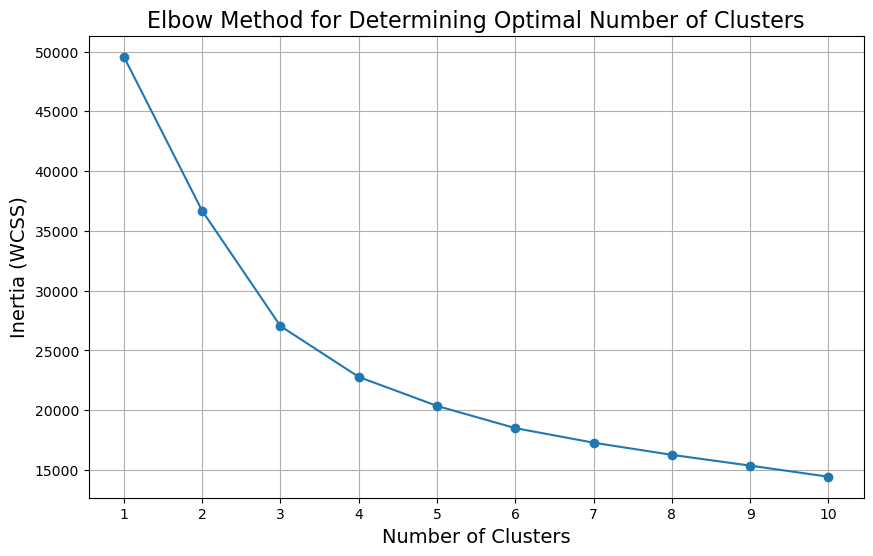

In [10]:
### Question 7-9: Determine the Optimal Number of Clusters  
from sklearn.preprocessing import StandardScaler  

# Standardize features  
# scaler = StandardScaler()  
# x_scaled = scaler.fit_transform(x)  # Use the previously defined `x` for features  

# Initialize a list to store inertia values  
inertia_values = []  

# Use a for loop to calculate inertia for cluster counts from 1 to 10  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, random_state=42)  
    kmeans.fit_predict(x)  # Fit on the x
    inertia_values.append(kmeans.inertia_)  # Collect the inertia value for each k  

# Plot the inertia values to visualize the elbow method  
plt.figure(figsize=(10, 6))  
plt.plot(range(1, 11), inertia_values, marker='o')  
plt.xlabel('Number of Clusters', fontsize=14)  
plt.ylabel('Inertia (WCSS)', fontsize=14)  
plt.title('Elbow Method for Determining Optimal Number of Clusters', fontsize=16)  
plt.xticks(range(1, 11))  # Set x-tick marks  
plt.grid(True)  
plt.show() 

In [11]:
# Fit KMeans with optimal clusters  
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)  
clusters = kmeans.fit_predict(x)   

# Create a new DataFrame to hold the features and cluster labels  
clustered_data = pd.DataFrame(x, columns=x.columns)  # Use the column names from `x`  
clustered_data['Cluster'] = clusters  # Add the cluster labels  

# Print the new DataFrame with cluster labels   
print("\nDataset with Cluster Labels:")  
display(clustered_data)  

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Dataset with Cluster Labels:


,Page Views,Session Duration,Time on Page,Previous Visits,Cluster
0,5,11.051381,3.890460,3,4
1,4,3.429316,8.478174,0,0
2,4,1.621052,9.636170,2,0
3,5,3.629279,2.071925,3,1
4,5,4.235843,1.960654,5,1
...,...,...,...,...,...
1995,1,2.724513,1.324206,2,3
1996,3,0.392856,3.824416,1,3
1997,4,9.899823,1.288675,1,4
1998,3,0.393319,5.037584,2,3


In [12]:
### Question 9 Cluster Analysis
cluster_means = clustered_data.groupby('Cluster').mean()  
print("\nMean values for each cluster:")  
cluster_means


Mean values for each cluster:


,Page Views,Session Duration,Time on Page,Previous Visits
Cluster,,,,
0,4.863636,2.203504,8.841560,1.960227
1,4.376855,5.563189,3.100685,2.000000
2,7.377551,1.743790,2.988443,2.118367
3,3.519766,1.404676,2.812258,1.904832
4,5.036232,11.447904,3.714557,1.840580



Updated mean values for each cluster with additional features:


,Page Views,Session Duration,Time on Page,Previous Visits,Bounce Rate,Conversion Rate
Cluster,,,,,,
0,4.863636,2.203504,8.841560,1.960227,0.293055,1.000000
1,4.376855,5.563189,3.100685,2.000000,0.287762,0.997210
2,7.377551,1.743790,2.988443,2.118367,0.285030,0.987102
3,3.519766,1.404676,2.812258,1.904832,0.282421,0.958113
4,5.036232,11.447904,3.714557,1.840580,0.266982,1.000000


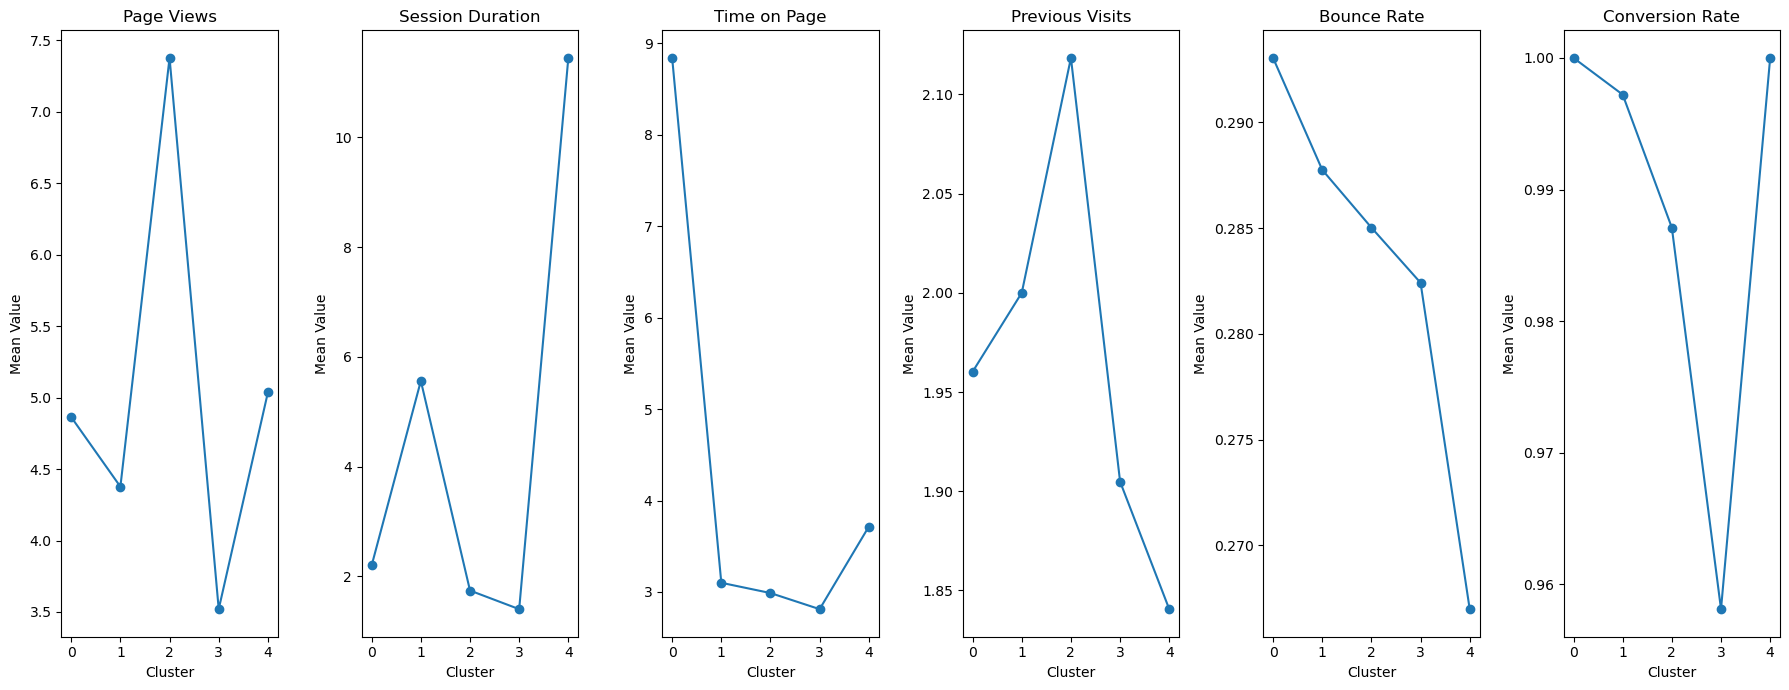

In [13]:
# Question 10  
# Additional features to include  
additional_features = ['Bounce Rate', 'Conversion Rate']  
# Add the additional features to the clustered_data DataFrame  
for feature in additional_features:  
    if feature in website_traffic.columns:  # Ensure it exists in the original DataFrame  
        clustered_data[feature] = website_traffic[feature]  
    else:  
        print(f"{feature} does not exist in the original dataset.")  

# Recalculate mean values including additional features  
cluster_means = clustered_data.groupby('Cluster').mean()  
print("\nUpdated mean values for each cluster with additional features:")  
display(cluster_means)  

# Plot the mean values for each feature (including additional features) across clusters  
features = cluster_means.columns  
num_features = len(features)  

# Set the figure size and layout  
plt.figure(figsize=(num_features * 3, 7))  # Adjust width and height  

# Plot each feature's mean across clusters  
for i, feature in enumerate(features):  
    plt.subplot(1, num_features, i + 1)  # 1 row, num_features columns  
    plt.plot(cluster_means.index, cluster_means[feature], marker='o')  
    plt.title(feature)  
    plt.xlabel('Cluster')  
    plt.ylabel('Mean Value')  

plt.tight_layout()  
plt.show() 

In [14]:
### Question 11

# The analysis of the clusters reveals distinct patterns in user engagement and website performance.   
# Cluster 4 stands out as the best-performing group, characterized by high session duration, significant time spent on individual pages, a low bounce rate, and the highest conversion rate.   
# This suggests that users are highly engaged with the websites in this cluster, leading to effective conversions.   

# Conversely, Cluster 3 emerges as the worst-performing group, exhibiting the lowest page views, session duration, and conversion rate, i
#indicating users spend minimal time on these sites and are less likely to engage deeply with the content.   

# In contrast, Cluster 2 demonstrates strong user retention, reflected in high previous visits, while still maintaining significant page views.   
# This indicates strong user loyalty and retention, suggesting that users find value in returning to these websites.  

# Clusters 0 and 1 exhibit average performance, with Cluster 0 showing a concerningly high bounce rate, indicating potential issues with user engagement or content relevancy.   
# Notably, despite its high bounce rate, Cluster 0 maintains a very high conversion rate and a relatively high time on page.   
# This suggests that while many users leave quickly, those who stay are highly engaged and likely to convert.  
